# Presentación de la empresa, organización o problema específico  

#### De acuerdo a la Organización Mundial de la Salud (OMS), ACV es la segunda causa de muerte a nivel global, responsable de aproximadamente 11% de las muertes totales.
#### Este set de datos es utilizado para predecir si un paciente es propenso a tener un ACV basado en los parametros como género, edad, enfermedades varias, y estado de fumador. Cada fila en los datos provee información relevante sobre el paciente.


#### Preguntas y objetivos de la investigación.

.¿Cuál es el género más propenso a tener un acv?  
.¿Cuál es el grado de influencia de ser fumador?  
.¿Existe relación entre el índice de masa corporal y el nivel de glucosa para contraer un acv?  
.¿Qué tanto influye el tipo de trabajo en la posibilidad de tener un acv?  
.¿Aumentan las probabilidades de tener un acv a mayor edad?    
.¿Tener hipertensión influye a la hora de tener un acv?  // Se cambió la pregunta en base a la corrección de Maxi, no tenemos niveles de hipertensión, sólo veradero o falso
.¿Tiene relación el estado marital con tener un acv?  


El objetivo de la investigación es determinar cuales son las variables mas influyentes a la hora de provocar un acv. Utilizando un modelo de predicción vamos a poder determinar si una persona es mas propensa a tener un acv.





#### 3. Conformación del equipo de trabajo. 
Martin Marino  
Leandro Bruzzo  

# Indicación de la fuente del dataset y los criterios de selección (Data Acquisition)
#### El dataset fue obtenido de la plataforma Kaggle desde el siguiente link : https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

#### Información sobre el data set:
- Creador: fedesoriano - https://www.kaggle.com/fedesoriano

- Información de los atributos: 
1) id: identificador único  
2) gender: "Male", "Female" o "Other" (Masculino, Femenino u Otro)  
3) age: Edad del paciente  
4) hypertension: 0 si el paciente no tiene hipertensión , 1 si el paciente tiene hipertensión  
5) heart_disease: 0 si el paciente no tiene enfermedades del corazón, 1 si el paciente tiene enfermedades del corazón  
6) ever_married: "No" o "Yes" (No o Sí)  
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed" (Niño, trabajo en el sector público, nunca trabajó, privado o monotributista)  
8) Residence_type: "Rural" or "Urban"   
9) avg_glucose_level: nivel promedio de glucosa en la sangre  
10) bmi: Índice de masa corporal  
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"* (Fumador frecuente, nunca fumó, fuma, desconocido)  
12) stroke: 1 si el paciente tuvo un ACV 0 si no lo tuvo (Variable Target)  
*Nota: 'Uknown' en smoking_status indica que no se registró un estado del paciente.

Información sobre Kaggle:
Kaggle, una subsidiaria de Google LLC, es una comunidad en línea de científicos de datos y profesionales del aprendizaje automático.

#### Generación del primer Data Wrangling y EDA, apuntado a sus datos (insights) univariado, bivariado y multivariado.

In [93]:
#Librerías neceasrias para el correcto funcionamiento del jupyter (descomentar para ejecutar por primera vez y luego volver a comentarlo)

# import sys
# !{sys.executable} -m pip install --upgrade pip
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install seaborn
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install pandas_profiling
# !{sys.executable} -m pip install plotly.express
# !{sys.executable} -m pip install ipywidgets
# !{sys.executable} -m pip install nbformat
# !{sys.executable} -m pip install sklearn

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
import plotly.express as px


In [95]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [96]:
df.shape

(5110, 12)

In [97]:
#Creamos un dataframe con las columnas work_type y residence_type en booleano (Es decir, 0 y 1) para ser utilizados en la matriz de correlación

df.rename(columns = {'Residence_type':'residence_type'}, inplace = True)
df_2 = df #Realizamos una copia del dataframe original para la matriz de correlación
#Reemplazamos los valores Yes y No de ever_married con 1 y 0
df_2['ever_married'].replace(
                to_replace=['Yes', 'No'], 
                value=[1,0,], 
                inplace=True, 
)
df_2['residence_type'].replace(
                to_replace=['Urban', 'Rural'], 
                value=[0,1,], 
                inplace=True, 
)

df_2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,1,Private,0,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,1,Self-employed,1,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,1,Private,1,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,1,Private,0,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,1,Self-employed,1,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,1,Private,0,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,1,Self-employed,0,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,1,Self-employed,1,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,1,Private,1,166.29,25.6,formerly smoked,0


In [98]:
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
ever_married,5110.0,0.656164,0.475034,0.00,0.000,1.000,1.00,1.00
residence_type,5110.0,0.491977,0.499985,0.00,0.000,0.000,1.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


#### EDA Utilizando la librería pandas_profiling

In [99]:
df_2.profile_report(title='Data Profiling')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Con el siguiente gráfico de torta podemos observar el gran desbalanceo de nuestro set de datos. Esto será crucial a la hora de preparar nuestros algoritmos, ya que un desbalance tan marcado puede ocasionar una gran pérdida de precisión.


In [100]:
df_pie = df.copy()
df_pie['stroke'].replace(
                to_replace=[0, 1], 
                value=["No","Yes"], 
                inplace=True)
fig = px.pie(df_pie, names="stroke",values='id', hole=.3, title='Stroke Distribution')
fig.show()

In [101]:
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

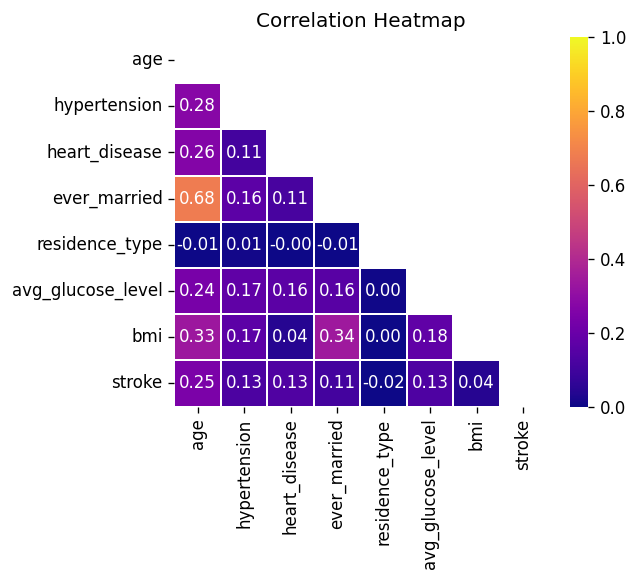

In [102]:
#Creamos un df sin la columna id para ser utizado en el mapa de correlación, ya que el mismo es un identificador único.
df_2Heatmap = df_2.drop(columns=['id'])
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(df_2Heatmap.corr(),dtype = bool))
sns.heatmap(df_2Heatmap.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma', vmax=1, vmin=0)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

#### Con el mapa de correlación y el Data Profiling, se pueden observar las correlaciones positivas y/o negativas de las variables.

Se ha decidido descartar la columna residence_type, ya que esta no presenta un impacto en el dataset ni correlaciones positivas y/o negativas de forma significante. (-0,02 como el mayor coeficiente)

In [103]:
#Eliminamos la columna residence_type antes de seguir analizando en profundida el dataset.
df.drop(['residence_type'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 439.3+ KB


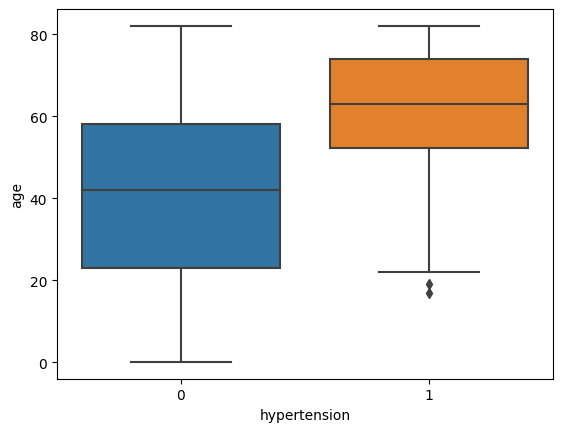

In [104]:
sns.boxplot(y = 'age', x = 'hypertension', data = df)
plt.show()

### Con el gráfico superior, se puede observar la distribución de personas con hipertensión en base a la edad. 
#### Las personas con hipertensión tienen una media de 65 años, mientras las que no tienen, 42 años.
#### Esto nos sirve para visualizar mejor como a mayor edad, la gente es más propensa a presentar hipertensión.

#### A continuación realizaremos gráficos de boxplot para todas las columnas, con el fin de observar con mayor detalle la distribución de valores junto a la presencia (o no) de outliers.

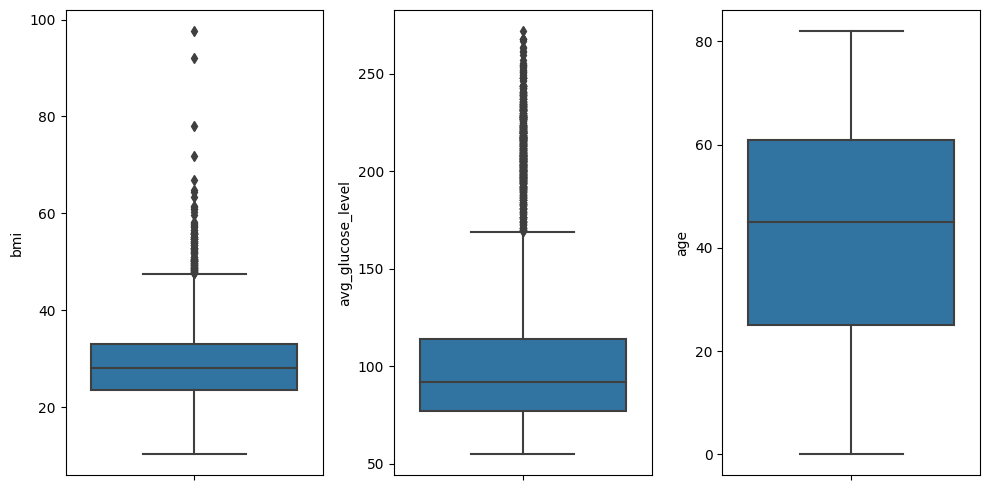

In [105]:
variables = ['bmi', 'avg_glucose_level', 'age']

fig, axes = plt.subplots(1, len(variables), figsize=(10,5))

for ax, variable in zip(axes, variables):
    ax = sns.boxplot( y=variable, data=df, ax=ax)
plt.tight_layout()

plt.show()

#### En los gráficos de boxplot se pueden observar una gran presencia de outliers (valores atípicos), estos se mantendrán en el dataset ya que en este caso en particular, no presenta un problema, siendo que son valores válidos y representan la gran cantidad de datos. Eliminarlos reduciría la utilidad del dataset de forma drástica

#### Filtros y limpieza del dataset a utilizar para los modelos de ML

In [106]:
#Vemos los valores unicos para la columna de smoking status y posteriormente excluimos los desconocidos
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

#### En smoking_status se puede observar que tenemos valores "Unknown", se realizará un conteo de los mismos para observar el impacto de su eliminación, ya que dicho estado no nos aporta nada en el análisis.

In [107]:
df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

#### Unknown tiene una cantidad de registros de 1544, aproximadamente el 30% de los datos. Debido a que no podemos asumir si esa persona fuma o no, se tomará la decisión de eliminarlos. 

In [108]:
#Eliminar los datos unknown de la columna smoking_status

df['smoking_status'].values
df = df[df.smoking_status != 'Unknown']
df.smoking_status.value_counts()

never smoked       1892
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

#### BMI tiene 140 valores nulos, los mismos podrían ser eliminados pero debido a que el dataset perdió gran cantidad de datos al eliminar los registros con smoking_status = Unknown, se precederá a utilizar un promedio para los mismos.


In [109]:
for i in df.columns[df.isnull().any(axis=0)]:   
    df[i].fillna(df[i].mean(),inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3566 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3566 non-null   int64  
 1   gender             3566 non-null   object 
 2   age                3566 non-null   float64
 3   hypertension       3566 non-null   int64  
 4   heart_disease      3566 non-null   int64  
 5   ever_married       3566 non-null   int64  
 6   work_type          3566 non-null   object 
 7   avg_glucose_level  3566 non-null   float64
 8   bmi                3566 non-null   float64
 9   smoking_status     3566 non-null   object 
 10  stroke             3566 non-null   int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 334.3+ KB


C:\Users\Martin\AppData\Local\Temp\ipykernel_10316\1231436049.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Como se pudo observar en la línea anterior, se han completados los valores NaN de la columna bmi con el valor promedio de los mismos

#### Hay que tener en consideración la pérdida de datos, hemos pasado de 5110 registros a 3566. Sin embargo, estos datos siguen siendo válidos, más limpios y pueden ser utilizados para el modelo de ML. 

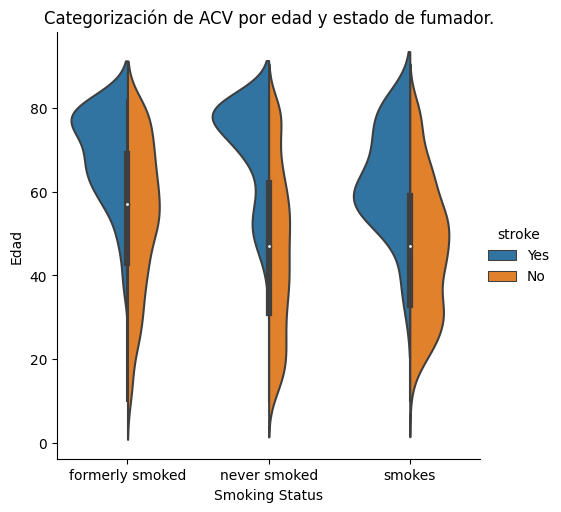

In [110]:
df_smoking = df[(df['smoking_status']) != 'Unknown']
df_smoking2 = df.copy()
df_smoking2['stroke'].replace(
                to_replace=[0, 1], 
                value=["No","Yes"], 
                inplace=True)
ax = sns.catplot(data=df_smoking2, kind='violin', x='smoking_status', y='age',   hue='stroke', split=True)
ax.set(xlabel='Smoking Status', ylabel='Edad', title='Categorización de ACV por edad y estado de fumador.')
plt.show()

In [111]:
df.gender.value_counts()

Female    2158
Male      1407
Other        1
Name: gender, dtype: int64

#### En la columna gender podemos observar que hay un único registro con el género other, por motivos de espacio de memoria el mismo será eliminado ya que al preparar el dataset para utilizar algoritmos de clasificación empleando data dummies, se creará una columna extra en consecuencia de este único valor.

In [112]:
df = df[df.gender != 'Other']
df.gender.value_counts()

Female    2158
Male      1407
Name: gender, dtype: int64

#### Aplicación de modelos de ML

#### Una vez realizado los diferentes tipos de análisis y limpieza de datos necesaria, es momento de aplicar algoritmos de clasificación.

In [113]:
#Creamos un data dummie para obtener las variables categóricas como booleanas (es decir 0,1)
df_dummy = pd.get_dummies(df, drop_first=True)
df_dummy = df_dummy.drop('id', axis=1)
df_dummy    

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Male,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,1,228.69,36.600000,1,1,0,1,0,0,0,0
1,61.0,0,0,1,202.21,30.290047,1,0,0,0,1,0,1,0
2,80.0,0,1,1,105.92,32.500000,1,1,0,1,0,0,1,0
3,49.0,0,0,1,171.23,34.400000,1,0,0,1,0,0,0,1
4,79.0,1,0,1,174.12,24.000000,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5102,57.0,0,0,1,77.93,21.700000,0,0,0,1,0,0,1,0
5105,80.0,1,0,1,83.75,30.290047,0,0,0,1,0,0,1,0
5106,81.0,0,0,1,125.20,40.000000,0,0,0,0,1,0,1,0
5107,35.0,0,0,1,82.99,30.600000,0,0,0,0,1,0,1,0


In [114]:
#Separamos los datos de entrada de la salida
X = df_dummy.drop('stroke', axis=1) #Elimino de mi dataset la variable a predecir
y = df_dummy.stroke #Defino el Target

In [115]:
#Importamos la libreria para separar en train y test
from sklearn.model_selection import train_test_split 

#Me quedo con 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) 

In [116]:
from sklearn.tree import DecisionTreeClassifier #Importamos el modelo
tree = DecisionTreeClassifier(max_depth=2, random_state = 42, class_weight="balanced") #Creamos el modelo

#### Se agregó el hiperparámetro class_weight="balanced" para ayudar al algoritmo DecisionTree a trabajarlo de forma desbalanceada.

In [117]:
#Entrenamos el modelo
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, random_state=42)

In [118]:
y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test) #Prediccion en Test

#### Para trabajar con este dataset, es necesario recurrir a hiperparámetros que nos permitan manipular datos desbalanceados como en este caso. A continuación se utilizarán dos métricas de la libreria Sklearn como lo es accuracy_score y balanced_accuracy_score; este último se especializa en dataset desbalanceados.  

In [119]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train

train_accuracy_balanced = balanced_accuracy_score(y_train, y_train_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)
#Calculo el accuracy en Test
test_accuracy_balanced = balanced_accuracy_score(y_test, y_test_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Accuracy Score')
print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

print('\nBalanced Accuracy Score')
print('% de aciertos sobre el set de entrenamiento:', train_accuracy_balanced)
print('% de aciertos sobre el set de evaluación:',test_accuracy_balanced)



Accuracy Score
% de aciertos sobre el set de entrenamiento: 0.8183730715287517
% de aciertos sobre el set de evaluación: 0.8134642356241234

Balanced Accuracy Score
% de aciertos sobre el set de entrenamiento: 0.7333382066276803
% de aciertos sobre el set de evaluación: 0.6685520361990951


#### DecisionTree sin class_weight="balanced"
Accuracy  
% de aciertos sobre el set de entrenamiento: 0.9474053295932678    
% de aciertos sobre el set de evaluación: 0.9284712482468443

Balanced Accuracy Score  
% de aciertos sobre el set de entrenamiento: 0.5127875243664718  
% de aciertos sobre el set de evaluación: 0.49924585218702866  

#### DecisionTree con class_weight="balanced"
% de aciertos sobre el set de entrenamiento: 0.8183730715287517  
% de aciertos sobre el set de evaluación: 0.8134642356241234  

Balanced Accuracy Score  
% de aciertos sobre el set de entrenamiento: 0.7333382066276803  
% de aciertos sobre el set de evaluación: 0.4984917043740573

#### Como se pudo observar, el class_weight="balanced" reduce el porcentaje de Accuracy, pero es necesario ya que de no incluirlo, estaríamos basándonos en la mayoría de datos y no en la minoría; con este hiperparámetro el algoritmo le da la misma importancia a ambos grupos.


#### Además del algoritmo DecisionTree, aplicaremos KNeighborsClassifier y Random Forest para ver su efectividad.

In [120]:
df_dummy.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Male,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,1,228.69,36.600000,1,1,0,1,0,0,0,0
1,61.0,0,0,1,202.21,30.290047,1,0,0,0,1,0,1,0
2,80.0,0,1,1,105.92,32.500000,1,1,0,1,0,0,1,0
3,49.0,0,0,1,171.23,34.400000,1,0,0,1,0,0,0,1
4,79.0,1,0,1,174.12,24.000000,1,0,0,0,1,0,1,0


In [121]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3565 entries, 0 to 5108
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          3565 non-null   float64
 1   hypertension                 3565 non-null   int64  
 2   heart_disease                3565 non-null   int64  
 3   ever_married                 3565 non-null   int64  
 4   avg_glucose_level            3565 non-null   float64
 5   bmi                          3565 non-null   float64
 6   stroke                       3565 non-null   int64  
 7   gender_Male                  3565 non-null   uint8  
 8   work_type_Never_worked       3565 non-null   uint8  
 9   work_type_Private            3565 non-null   uint8  
 10  work_type_Self-employed      3565 non-null   uint8  
 11  work_type_children           3565 non-null   uint8  
 12  smoking_status_never smoked  3565 non-null   uint8  
 13  smoking_status_smo

In [122]:
#Importamos el algoritmo KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [123]:
#Aplicamos un n_neighbors de 6 al df
knn = KNeighborsClassifier(n_neighbors=6)
X = df_dummy[['age',
              'hypertension',
              'heart_disease', 
              'avg_glucose_level',
              'bmi', 
              'gender_Male', 
              'ever_married', 
              'work_type_Never_worked', 
              'work_type_Private',
              'work_type_Self-employed', 
              'work_type_children', 
              'smoking_status_never smoked',
              'smoking_status_smokes']]
y = df[['stroke']]
knn.fit(X, y) #Entrenamos el modelo

c:\Users\Martin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



KNeighborsClassifier(n_neighbors=6)

In [124]:
#Medimos la efectividad del modelo

n_neighbors = 6

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Precisión del K-NN en set de entrenamiento: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Precisión del  K-NN en set de evaluación: {:.2f}'
     .format(knn.score(X_test, y_test)))

Precisión del K-NN en set de entrenamiento: 0.95
Precisión del  K-NN en set de evaluación: 0.93


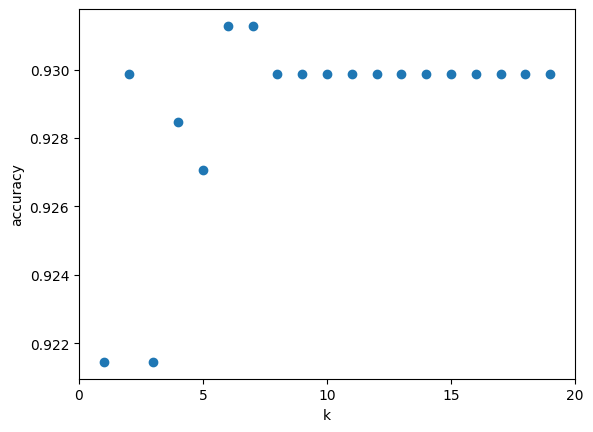

In [125]:
#Asignamos el valor n_neighbors=6 basándonos en el siguiente código, donde vemos distintos valores k y la precisión obtenida.

k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

In [126]:
#Confirmamos la precisión viendo la matriz de confusión y el reporte sobre el conjunto de test, 
# que nos detalla los aciertos y fallos
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[663   0]
 [ 50   0]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       663
           1       0.00      0.00      0.00        50

    accuracy                           0.93       713
   macro avg       0.46      0.50      0.48       713
weighted avg       0.86      0.93      0.90       713



c:\Users\Martin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Martin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Martin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [127]:
from sklearn.ensemble import RandomForestClassifier

#### Como último algoritmo utilizaremos el RandomForestClassifier con el respectivo hiperparámetro class_weight="balanced", con el mismo fin del DecisionTree, es decir, trabajar en un dataset desbalanceado

In [131]:
#Creamos un random forest!
model = RandomForestClassifier(random_state=42, n_estimators=200,
                              class_weight="balanced" ,max_features="log2")
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=200, random_state=42)

In [132]:
y_test_pred = model.predict(X_test) #Prediccion en Test

In [133]:
#Calculo el accuracy en Test
train_accuracy_balanced = balanced_accuracy_score(y_train, y_train_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)
#Calculo el accuracy en Test
test_accuracy_balanced = balanced_accuracy_score(y_test, y_test_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Accuracy Score')
print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

print('\nBalanced Accuracy Score')
print('% de aciertos sobre el set de entrenamiento:', train_accuracy_balanced)
print('% de aciertos sobre el set de evaluación:',test_accuracy_balanced)


Accuracy Score
% de aciertos sobre el set de entrenamiento: 0.8183730715287517
% de aciertos sobre el set de evaluación: 0.9284712482468443

Balanced Accuracy Score
% de aciertos sobre el set de entrenamiento: 0.7333382066276803
% de aciertos sobre el set de evaluación: 0.49924585218702866


#### RandomForest con class_weight="balanced"
Accuracy Score  
% de aciertos sobre el set de entrenamiento: 0.8183730715287517  
% de aciertos sobre el set de evaluación: 0.9270687237026648  

Balanced Accuracy Score  
% de aciertos sobre el set de entrenamiento: 0.7333382066276803  
% de aciertos sobre el set de evaluación: 0.4984917043740573  